<a href="https://colab.research.google.com/github/Xiaocong233/ReinforcementLearning_ML/blob/master/RL_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning Tutorial in Python**
###### Created by **Xiaocong (Bill) Yan** for [StartOnAI](https://startonai.com/)
---


## 1. Introduction to RL

![](https://lilianweng.github.io/lil-log/assets/images/RL_illustration.png)

Sources: [A (Long) Peek into Reinforcement Learning by Lilian Weng](https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html)

- What is Reinforcement Learning?
  - RL is a subfield in machine learning, it particularly focuses on training AI agents to behave in a certain way by learning directly from its surrounding environment
  - Essentially, we are training the agent to choose the optimal action (${a}$) given any state (${s}$) from the environment that will maxmimizes an engineered reward (${r}$)

- RL Applications
  - gameplaying AI
    - AlphaGo
    <img src="https://cdn.geekwire.com/wp-content/uploads/2016/03/160312-go-630x353.jpg" alt="alt text" width="500" height="300">

    - AlphaStar
    <img src="https://www.version2.dk/sites/v2/files/topillustration/2019/01/alphastarscreenshot.png" alt="alt text" width="600" height="337">
  
  - agent in simulation learning to walk
  <img src="https://nav74neet.github.io/media/blog/walking.png" alt="alt text"  width='600' height='250'>

  - robots learning to walk
  
    <img src="https://www.researchgate.net/profile/Pieter_Jonker/publication/236015074/figure/fig1/AS:299857928572950@1448503109999/a-LEO-a-2D-walking-robot-suitable-for-on-line-Reinforcement-Learning-8-b-Simplest.png" alt="alt text"  width='340' height='255'>

## 2. Explore-Exploit and Multi-Armed Bandit Problem

- A fundamental intuition of RL lies within the balancing of explore and exploit
- Example: casino multi-armed bandits (slot machines)
<img src="https://miro.medium.com/max/1250/1*7axVBpiVF4VQCxxP1UNcnw.png" alt="alt text"  width='743' height='280'>

  Sources: [The Multi-Armed Bandit — to explore or exploit?](https://medium.com/10x-curiosity/the-multi-armed-bandit-to-explore-or-exploit-88556cb67c1c)

  - suppose we have three bandits with their own unique probablities of winning the jackpot
    - in this case, the agent is learning from the environment "casino" containing the three bandits by repeatedly taking action and playing, along the way figuring out which bandit is the best to play
      - at start, the agent has no ideas what the probabilities are
      - the agent then "explores" by playing to find the bandit with the highest winning rate as quickly as possible such that it can then "exploit" it by playing solely on it

### 2A. Greedy Algorithm
  - drawing upon an updating sample proportion estimate ${\hat{p}}$ of each bandit (current number of wins / times played on the bandit), a basic greedy algorithm, as its name suggests, will only choose the bandit with the highest current sample proportion
  - problem: ${\hat{p}}$ may be drastically different than the real probability ${p}$, especially in the beginning where we don't have many samples or times played yet
    - in fact, in the beginning if we draw two bandits and one return a win and the other a loss, updating ${\hat{p}}$ will result in 1 for the victorious bandit and 0 for the losing bandit.
      - we will never again choose the losing bandit ever again using greedy algorithm since no matter how many times we update the probability for the victorious bandit, it will never reach below 0
      - practically, we will be missing out on exploring the losing bandit at all and choose to solely exploit the winning bandit, when, in reality, the unlucky losing bandit may have a much higher real winning probability

### 2B. Epsilon Greedy Algorithm
  - solution to the greedy problem: adding a chance in each draw, parameterized by variable ${epsilon}$, where we will choose randomly from all the existing bandits, regardless of their sample proportions
  - thus it is created a fundamental algorithm behind RL

optimal bandit: 4
bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.194 | true win_rate: 0.25
bandit3 estimate win-rate: 0.521 | true win_rate: 0.5
bandit4 estimate win-rate: 0.75 | true win_rate: 0.75

total reward: 7119.0
overall win-rate: 0.7119
explore count: 997
exploit count: 9003
optimal selection rate: 0.923
num times selected each bandit: [243.0, 247.0, 280.0, 9230.0]


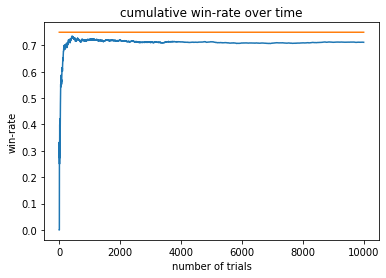

optimal bandit: 4
bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.243 | true win_rate: 0.25
bandit3 estimate win-rate: 0.483 | true win_rate: 0.5
bandit4 estimate win-rate: 0.75 | true win_rate: 0.75

total reward: 71203.0
overall win-rate: 0.71203
explore count: 9914
exploit count: 90086
optimal selection rate: 0.92541
num times selected each bandit: [2513.0, 2426.0, 2520.0, 92541.0]


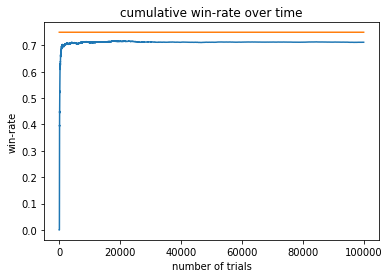

In [ ]:
# importing essential libraries for graphing and array processing
import matplotlib.pyplot as plt
import numpy as np

# creating the blueprint for a bandit slot machine
class Bandit:
  def __init__(self, p):
    self.p = p # the winning rate
    self.p_hat = 0. # sample proportion, or the estimation for the winning rate, intialized to 0
    self.n = 0. # number of samples collected on this bandit

  def pull(self):
    # draw the virtual bandit with a random probability p and check if won according to the winning rate
    # return 1 if won, 0 if lost
    return np.random.random() < self.p

  def update(self, x):
    # increment numbers of samples collected
    self.n += 1.
    # calculate the new p hat from the previous p hat and the newly obtained value (0 or 1)
    self.p_hat = ((self.n - 1) * self.p_hat + x) / self.n

def run_simulation(bandits_probs_list, epsilon, N):
  # bandits_probs_list: a list containing the win-rates of bandits that we want to create
  # epsilon: probability of random selection
  # n: numbers of trials, times we pull from bandits

  # create a list of bandit objects according to their probabilities of win rate
  bandits = [Bandit(p) for p in bandits_probs_list]
  
  # initialize variables
  rewards = np.zeros(N)
  times_explored = 0
  times_exploited = 0
  times_optimal_chosen = 0

  # selecting the optimal bandit based the highest true probability
  optimal_bandit = np.argmax([bandit.p for bandit in bandits])
  # print out the true optimal bandit number
  print('optimal bandit:', optimal_bandit + 1) # +1 because optimal_bandit is 0 indexed

  # use epsilon_greedy to select the next bandit
  for i in range(N):
    # if probability drawn is smaller than epsilon, randomly select a bandit
    if np.random.random() < epsilon:
      times_explored += 1
      bandit = np.random.randint(len(bandits))
    # else selecting the bandit with the highest p_hat
    else:
      times_exploited += 1
      bandit = np.argmax([bandit.p_hat for bandit in bandits])
                         
    # check if the bandit chosen is actually the optimal bandit
    if bandit == optimal_bandit:
      # update the correct action count
      times_optimal_chosen += 1

    # pull the arm for the bandit selected
    x = bandits[bandit].pull()

    # update rewards logs and sample proportion estimates accordingly
    rewards[i] = x
    bandits[bandit].update(x)     
  
  # print proportion estimates for each bandit
  for i, bandit in enumerate(bandits):
    print(f'bandit{i + 1} estimate win-rate: {round(bandit.p_hat, 3)} | true win_rate: {bandit.p}')

  # print total reward
  print()
  print('total reward:', rewards.sum())
  print('overall win-rate:', rewards.sum() / N)
  print('explore count:', times_explored)
  print('exploit count:', times_exploited)
  print('optimal selection rate:', times_optimal_chosen / N)
  print("num times selected each bandit:", [bandit.n for bandit in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(N) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(N) * np.max(bandits_probs_list))
  plt.title('cumulative win-rate over time')
  plt.xlabel('number of trials')
  plt.ylabel('win-rate')
  plt.show()

if __name__ == '__main__':
  # simulate two multi-armed bandit problem with 4 machines with win-rates 0, 0.25, 0.5, 0.75
  # Epsilon default to 0.1, thus 10% of random selection chance
  # N defaulted to 10000 trials for first simulation, 100000 for the second
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 10000)
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 100000)

  - problem: the chance of selecting a random bandit is fixed throughout all trials
    - as time progresses and we collect more and more samples, we should be more confident about the sample proportion estimating the real proportion, therefore we should spend more time exploiting rather than exploring.
  - solution 1: decaying epsilon
    - we can decrease the epsilon throughout the trials by setting it inversely proportional to trials ${n}$ (${\frac{epsilon}{n}}$), or be parametrized by a separate variable for time: ${t}$ (${\frac{epsilon}{t}}$).
      - both would function the same way in which we would do random selection less and less as we collect more samples.
  - solution 2: probability distribution algorithms
    - Upper Confidence Bound (UCB)
    - Thompson Sampling



### 2C. Upper Confidence Bound (UCB) Algorithm
**I. Background**
- during the explanation of the problem in Epsilon Greedy, the word "confidence" was referred in the intuitive sense
  - in fact, this confidence can be modeled mathetically as the "confidence interval", in this case the probabilistic deviation of the true proportion around our sample mean which equals to
  ![alt text](https://mat117.wisconsin.edu/wp-content/uploads/2014/12/section8-7.png)
    - ${\hat{p}}$ = sample mean
    - ${z}$ = how many standard deviations away on a normal distribution
    - ${n}$ = numbers of samples taken

    ![alt text](https://qph.fs.quoracdn.net/main-qimg-fb825a5584d571ed78ef869a50793a83.webp)
  
  - as we take more samples, we see the curve of probability distribution tightens
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Marginoferror95.PNG/400px-Marginoferror95.PNG" alt="alt text"  width='400' height='378'>
  
  - mathematically, since ${n}$ is in the denominator, as it increases, our overall confidence interval size decreases
    - there can also be seen a larger under the curve covering around the sample mean (or proportion)
      - now, at the same confidence level, we will have a smaller confidence interval knowing the true proportion is closer to our sample proportion

**II. UCB Intuition**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126022459/Screenshot-2020-01-26-at-2.24.37-AM.png" alt="alt text"  width='743' height='340'>

Sources:[Upper Confidence Bound Algorithm in Reinforcement Learning](https://www.geeksforgeeks.org/upper-confidence-bound-algorithm-in-reinforcement-learning/)

- UCB's confidence interval for each bandit, similar to a traditional confidence interval, is modeled by the addition of a sample mean estimate with an error term: ${X_j}$ ± ${error}$
  - ${X_j}$ = sample mean of choosing bandit ${j}$
  - ${error}$ = $\sqrt{\frac{C\ln(N)}{n_j}}$, ${C}$ is a constant parameter controlling the size of the bound, ${N}$ is number of trails taken, ${n_j}$ is the number of times bandit j has been selected
    - intuitively, the error term will gradually decrease with more samples collected on one bandit as ${n_j}$ increases in the denominator, representing the agent becoming more confident of the sample proportion estimate
    - however, as trial number increases and a bandit has not been selected very often such that ${n_j}$ is low relative to trials ${N}$, the error will become high, since in UCB the agent will opt for the bandit with the highest upperbound, it is more likely for the bandit with a high error to be selected to explore
      - interestingly, since ${N}$ is inside of a log function, it gradually becomes less weighted compared ${n_j}$, the error term thus will gradually shrink down to zero with more we explore each bandit

**III. Code**
    


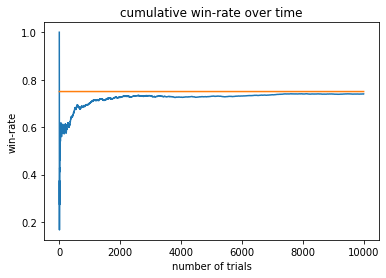

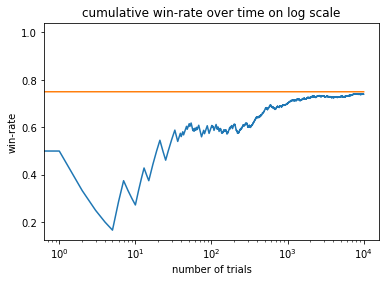

bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.122 | true win_rate: 0.25
bandit3 estimate win-rate: 0.423 | true win_rate: 0.5
bandit4 estimate win-rate: 0.749 | true win_rate: 0.75
total reward earned: 7400.0
overall win rate: 0.74
num times selected each bandit: [30.0, 41.0, 137.0, 9796.0]


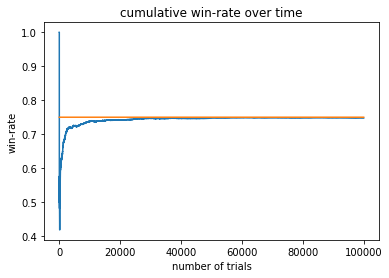

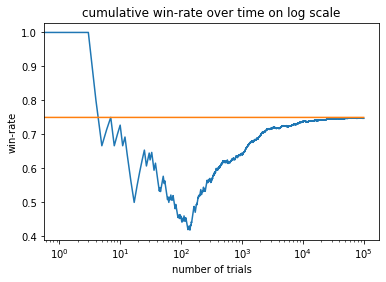

bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.256 | true win_rate: 0.25
bandit3 estimate win-rate: 0.515 | true win_rate: 0.5
bandit4 estimate win-rate: 0.749 | true win_rate: 0.75
total reward earned: 74756.0
overall win rate: 0.74756
num times selected each bandit: [40.0, 90.0, 371.0, 99503.0]


In [ ]:
# importing essential libraries for graphing and array processing
import numpy as np
import matplotlib.pyplot as plt

# creating the blueprint for a bandit slot machine
class Bandit:
  def __init__(self, p):
    self.p = p # the winning rate
    self.p_hat = 0. # sample proportion, or the estimation for the winning rate, intialized to 0
    self.n = 0. # number of samples collected on this bandit

  def pull(self):
    # draw the virtual bandit with a random probability p and check if won according to the winning rate
    # return 1 if won, 0 if lost
    return np.random.random() < self.p

  def update(self, x):
    # increment numbers of samples collected
    self.n += 1.
    # calculate the new p hat from the previous p hat and the newly obtained value (0 or 1)
    self.p_hat = ((self.n - 1) * self.p_hat + x) / self.n

def ucb(X, N, n):
  # return the upper bound of bandit
    # X: sample proportion estimate of this bandit's win-rate
    # N: total numbers of trials so far
    # n: total numbers of time this bandit has been selected
  return X + np.sqrt(2 * np.log(N) / n)


def run_simulation(bandits_probs_list, epsilon, trials):
  # bandits_probs_list: a list containing the win-rates of bandits that we want to create
  # epsilon: probability of random selection
  # trials: numbers of trials, times we pull from bandits

  # create a list of bandit objects according to their probabilities of win rate
  bandits = [Bandit(p) for p in bandits_probs_list]
  
  # initialize variables
  rewards = np.zeros(trials)
  N = 0

  # beginning by playing each bandit once to avoid 0/0
  for bandit in bandits:
    x = bandit.pull()
    bandit.update(x)
    N += 1
  
  # repeat for "trials" times
  for i in range(trials):
    # get the index of the bandit with the highest upper confidence bound
    bandit_index = np.argmax([ucb(bandit.p_hat, N, bandit.n) for bandit in bandits])

    # pull the bandit and update the sample proportion according to its reward, increment trials taken
    x = bandits[bandit_index].pull()
    bandits[bandit_index].update(x)
    N += 1

    # logging the reward for trial i
    rewards[i] = x

  # plot the results on linear scale
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(trials) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(trials) * np.max(bandits_probs_list))
  plt.title('cumulative win-rate over time')
  plt.xlabel('number of trials')
  plt.ylabel('win-rate')
  plt.show()

  # plot the results on log scale
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(trials) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(trials) * np.max(bandits_probs_list))
  plt.xscale('log')
  plt.title('cumulative win-rate over time on log scale')
  plt.xlabel('number of trials')
  plt.ylabel('win-rate')
  plt.show()

  # print proportion estimates for each bandit
  for i, bandit in enumerate(bandits):
    print(f'bandit{i + 1} estimate win-rate: {round(bandit.p_hat, 3)} | true win_rate: {bandit.p}')

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / trials)
  print("num times selected each bandit:", [bandit.n for bandit in bandits])

if __name__ == '__main__':
  # simulate two multi-armed bandit problem with 4 machines with win-rates 0, 0.25, 0.5, 0.75
  # Epsilon default to 0.1, thus 10% of random selection chance
  # N defaulted to 10000 trials for first simulation, 100000 for the second
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 10000)
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 100000)

**IV. Reflection**
- Compared to Epsilon Greedy, we see the agent's overall win-rate on UCB approaches quickly to the probability of winning on the optimal bandit, representing that the agent consolidates its selection choice down to the optimal bandit as it becomes more confident of its sample proportion estimate. There is also more times exploiting the optimal machine
  - Thus UCB is definitely superior when performing on higher numbers of trials

## 3. Markov Decision Processes (MDP)
- As preluded in the introduction, the diagram with circular interaction between the agent and its environment essentially is a simplified version of MDP
- MDP is a fundamental framework from which many of the advanced RL algorithms are developed from

![alt text](https://www.researchgate.net/profile/Daniele_Grattarola/publication/323218981/figure/fig9/AS:594583624896516@1518771191892/Graph-representation-of-an-MDP-Each-gray-node-represents-a-state-each-arc-leaving-a.png)

sources: [Graph representation of an MDP by Daniele Grattarola](https://www.researchgate.net/figure/Graph-representation-of-an-MDP-Each-gray-node-represents-a-state-each-arc-leaving-a_fig9_323218981)
  - Basically, it models after the probabilisitc transitions between states through choosing certain actions and their corresponding rewards
    - ${S}$ = state
    - ${a}$ = action
    - 0-1 decimal = probability
    - integer = reward

- MDP is derived upon basic Markov Models and a concept known as Markov Assumption (Markov Property)
    - We will be assuming that the probability distribution of our next states and rewards depends solely on our current state, therefore the first-order Markov assumption
      - though this may seem restriciting and unrealistic at first, the Markov Assumption is crucial towards simplifying the complex probablisitic transitions we observe in real life, and it is shown to be extremely practical and applicable in many fields

- Important Terminologies
  - Episode
    - each round of the game from a "start state" to a "terminal state"
  - Policy - ${\pi(s)}$
    - a function that decides what action to commit given a state $s$
    - the "brain" of the agent
    - this is essentially what we want to optimize
  - State Value Function - ${V_\pi(s)}$
    - this outputs the expected cumulative
future reward, that is, the summation of all rewards that will be received after current state $s$ using our currently policy ${\pi}$
    - will often be used to evaluate our policy
    - iterative formula
    ![alt text](https://i.imgur.com/uIsblET.png)
      - ${E_\pi}$(): expected value of
      - ${R(t+1)}$: return of choose current state ${s}$
      - ${\gamma}$: discounting variable
        - weighting more the value functions of the near future states by downgrading the expected value of reward the farther a future state is
      - ${V_\pi(s')}$: value of next state
  - Action Value Function - ${Q_\pi(s, a)}$ 
    - this outputs the expected future return given we commit an action ${a}$ on state ${s}$ and thereafter using only our current policy ${\pi}$
    - will often be used to update, or improve, our policy
    - iterative formula 
    ![alt text](https://i.imgur.com/NVIC3Zo.png)
      - the inner term 
${\sum_{a'}\ \pi(a' | s')\ Q_\pi(s', a')}$ gives the expected value of the next state action value function distribution by multiplying together the probability and value pair of each of possible next action ${a'}$ in next state ${s'}$

- Solving MDP
  - the solving techniques taken by many algorithms are also iterative and involve a loop between two steps
    - policy evaluation
      - this step will solve for the state value function discussed above given the agent's current policy
    - policy control (improvement)
      - this step will seek to update our policy by finding the best action at each state using the action value function derived from the state value function we obtained from policy evaluation

- Additional readings for MDP
  - [Reinforcement Learning Demystified: Markov Decision Processes (Part 1)](https://towardsdatascience.com/reinforcement-learning-demystified-markov-decision-processes-part-1-bf00dda41690)
  - [Reinforcement Learning Demystified: Markov Decision Processes (Part 2)](https://towardsdatascience.com/reinforcement-learning-demystified-markov-decision-processes-part-2-b209e8617c5a)


## 4. Monte Carlo Method
**I. Intro & Background**

Monte Carlo is an effective algorithm that, similar to solving a traditional multi-armed bandit problem, collect empirical data by repeatedly playing the game and uses the samples returns based on the action state transitions to gradually update, refine its policy, thus improving the agent's decision making
  - we can essentially think that Monte Carlo treats the action selection at each state as a separate multi-armed bandit problem, only that in this case the bandits are interrelated and we are trying to optimize them all at once 

**II. Monte Carlo Intuition**
- policy evaluation
  - solving policy evaluation involves finding the returns of state value functions ${V(s)}$ for all states given a policy
  - MC does this by running many rounds of episodes and collecting each state $s$ and their corresponding reward $r$, then calculating and recording the expected future rewards $G$ for each state in reverse time steps using iterative formula: ${G(t) = R(t+1) + \gamma\ G(t+1)}$, at last averaging G out for for each state to obtain the estimated returns ${V_\pi(s)}$
- policy control
  - recall that the action value function ${Q(s, a)}$ is required for solving policy control problem
  - similar to the approach we took in policy evluation, MC finds ${Q(s, a)}$ by logging an addition variable action ${a}$ the agent took on top of state ${s}$ and reward ${r}$ as it runs through many episodes
    - after obtaining the action value function, we can then update the agent's policy by simply choosing the action that returns the highest action value at each state: $\pi(s) = argmax_aQ(s,a)$

**III. Code in FrozenLake Environment**
- FrozenLake is one of the open-source training environments created by OpenAI for Reinforcement Learning experiments
  - it is a gridworld-like game with a movable agent and four states on the map: S for the starting state, F for frozen lake, H for hole, and G for the goal state or the terminal state 
    - agent will only receive a reward of 1 if it reaches the goal state, receiving 0 otherwise
  - we want to train the agent to navigate through each map, reaching the goal state through frozen lake without walking into a hole.
    - one thing to be aware is by default that the environment are also simulates the "slippery" nature of the frozen lake so there is a constant probability that the agent will go in a random direction instead of what it wants to go
- We will be using this library to test out our codes for Monte Carlo and later TD(0) and Q-Learning
  - [Website](https://gym.openai.com/envs/FrozenLake-v0/)
  - [Source](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py)

In [ ]:
# importing OpenAI gym containing the FrozenLake environment we will use
import gym
# importing essential libraries for graphing and array processing
import numpy as np
import matplotlib.pyplot as plt

# play through an episode of FrozenLake and return a list of (state, action, reward) observed using our current policy
def play_episode(env, policy):
    # reset the environment to starting state
    env.reset()
    # initialize a list containing the returning triples: state, action, and reward
    states_actions_rewards = []
    # mark the start state
    state = 0

    # start our episode with a maximum of 100 steps available before termination
    for t in range(100):
      # choose our action based on our current policy
      action = policy(state)
      # commit the action and get the returning new state, reward, whether if we reached a terminal state, and debugging information
      new_state, reward, done, info = env.step(action)
      # append the return as a tuple to the list
      states_actions_rewards.append((state, action, reward))
      # check that if we reached a terminal state if so print out the how many steps it took, then break through the loop
      if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
      # mark our new state as our state
      state = new_state

    return states_actions_rewards


# create and return the parameterized epsilon greedy policy as a function
def return_policy(policy_dict, epsilon = 0.2, env = env):

    def epsilon_greedy_policy(state):
        # draw a random float from 0 to 1, and if it is less than our epsilon
        if np.random.random() < epsilon:
          # return a random action based on our environment's action space
          return env.action_space.sample()
        else:
          # return the action decided by our policy
          return policy_dict[state]

    return epsilon_greedy_policy

# train the agent on "episodes" amount of games in the environment
def run_simulation(env, episodes, policy_dict, gamma=0.95):
    # initialize a np array, also known as the q-table, storing state-action values Q(s,a) with size of states by size actions (in our case 16 by 4)
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    # create a dictionary storing the cumulative return for each state and action pair
    returns_Q = dict()
    # create a dictionary storing the numbers of visits for each state and action pair
    nb_visits = dict()

    # get epsilon policy 
    policy = return_policy(policy_dict)
    
    for i in range(episodes):
        # play and get the return of each episode
        episode = play_episode(env, policy)
        # initialize the return of terminal state to be 0, by definition
        G = 0
        
        nb_visits = dict()

        # loop through the states_actions_rewards triples in reverse order
        for state, action, reward in reversed(episode):
            # calculate reward
            G = reward + gamma*G
            # update dictionaries
            returns_Q[state, action] = G
            nb_visits[state, action] += 1 
            # calculate and update the q-table
            Q[state, action] += 1/nb_visits[state, action] * (returns_Q[state, action] - Q[state,action])
        
            # update best policy for the state according to argmax (finding the action with highest action value)
            greedy_policy[state] = np.argmax(Q[state, :])
        
    return policy, greedy_policy, Q, returns_Q, nb_visits

Disadvantage: Monte Carlo needs to wait for the termination of each episode in order to calculate for the value functions to conduct its policy evluation and control given that it run the iterative algorithm in reverse order thus needs to know the reward at the terminal state.
- this means that Monte Carlo isn't a true "online" algorithm in a way it can't update while playing through an episode
- becomes problematic when an episode takes a long time to finish or that it never finishes

## 5. Temporal Difference (TD) Learning with Q-Learning
**I. Intro & Background**
- While TD also learns from experience by collecting empirical data, in contrast to Monte Carlo, it is a online algorithm which means it can calculate and update values even when playing through an episode
- TD uses rewards as estimates for the value functions instead of needing to calculate the actual returns $G$
  - it can iteratively improve its estimates based on existing estimates, a process known as bootstrapping

**II. TD(0) & Q-Learning Intuition**
- policy evaluation
  - TD(0) is an algorithm in TD learning that calculates for the expected return ${V_\pi(s)}$
    - instead of needing to use the average the actual returns $G$ like Monte Carlo in the calculation, TD(0) calculates for the average recursively using an alternative form of ${V(s)}$: $V(s) = V(s) + \alpha[r + \gamma V(s')-V(s)]$ using an estimate V from only the next state
      - $\alpha$: the moving average hyperparameter, usually from 0-0.5, essentially weighting the older sample means expotentially less by ${(1-\alpha)}$ when calculating for the new sample mean by adding the newest sample
      - instead of waiting for an entire episode to finish, we only need to wait for the next state in order to update our $V$ for our current state

- policy control
  - Q-Learning is an algorithm used for solving action value functions for TD learning
  - It follows the same pattern as TD(0) in which we will only need to know the estimate of action value function of next state in order to update our sample estimate of the action value function of our current state, following: $Q(s,a) = Q(s,a) + \alpha[r + \gamma max_a'Q(s', a') - Q(s, a)]$
  - It is also known as an off-policy method as the algorithm does not always follows the current best policy, rather choose random actions at times
    - though it tends to make episodes longer due to choosing suboptimal actions, it also explores more possible states, sometimes hideous ones, as a result

**III. Code in FrozenLake Environment**

## Sources: 

## Additional Resources & Links:
Book by Barton and Sutton: http://www.andrew.cmu.edu/course/10-703/textbook/BartoSutton.pdf

MDP: https://www.cs.cornell.edu/home/halpern/papers/markov.pdf
